In [25]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as stats
import json
from config import api_key
from pprint import pprint
import random

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [26]:
#Create url
url = "http://www.omdbapi.com/?t="

movie_key = "&apikey=" + api_key


In [27]:
# list acquired from: https://www.randomlists.com/random-movies
movie = pd.read_csv("Movies.csv", header=0, escapechar='\\')
movie.head()

,Movies
0,Spies in Disguise
1,Captain Marvel
2,Alien
3,Your Name.
4,Fantasy Island


In [28]:
#Pull sample of movies

#Create lists

movie["title"] = ""
movie["awards"] = ""
movie["director"]= ""
movie["genre"] = ""
movie["year"] = ""
movie["imdbRating"] = ""
movie["ratings_rotten"] = ""
movie["rating_ metacritic"] = ""
#movie["run_time"] = ""
#movie["writer"] = ""


index=0
for index, row in movie.iterrows():

    
    try:
        query_url = (url + str(row[0]) + movie_key)
        
        response = requests.get(query_url).json()
  
    
 
    
   
        #print(f"Gettting data for {['result'][0]['Title']}.")
   
        movie.loc[index, 'title'] = response['Title']
        movie.loc[index, 'awards'] = response['Awards']
        movie.loc[index, 'director'] = response['Director']
        movie.loc[index, 'genre'] = response['Genre']
        movie.loc[index, 'year'] = response['Year']
        movie.loc[index, 'imdbRating'] = response['imdbRating']
        movie.loc[index, 'ratings_rotten'] = response['Ratings'][1]['Value']
        movie.loc[index, 'rating_ metacritic'] = response['Metascore']
        #movie.loc[index, 'run_time'] = response['Runtime']
        #movie.loc[index, 'writer'] = response['Writer']
         
    except :
        print("Not a movie... skipping.")

Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.


In [29]:
response


{'Title': 'Gone Girl',
 'Year': '2014',
 'Rated': 'R',
 'Released': '03 Oct 2014',
 'Runtime': '149 min',
 'Genre': 'Drama, Mystery, Thriller',
 'Director': 'David Fincher',
 'Writer': 'Gillian Flynn (screenplay), Gillian Flynn (novel)',
 'Actors': 'Ben Affleck, Rosamund Pike, Neil Patrick Harris, Tyler Perry',
 'Plot': "With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.",
 'Language': 'English',
 'Country': 'USA',
 'Awards': 'Nominated for 1 Oscar. Another 64 wins & 183 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTk0MDQ3MzAzOV5BMl5BanBnXkFtZTgwNzU1NzE3MjE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '87%'},
  {'Source': 'Metacritic', 'Value': '79/100'}],
 'Metascore': '79',
 'imdbRating': '8.1',
 'imdbVotes': '823,738',
 'imdbID': 'tt2267998',
 'Type': 'movie',


In [30]:
movie.head()

,Movies,title,awards,director,genre,year,imdbRating,ratings_rotten,rating_ metacritic
0,Spies in Disguise,Spies in Disguise,3 nominations.,"Nick Bruno, Troy Quane","Animation, Adventure, Comedy, Family, Sci-Fi",2019,6.8,54/100,54
1,Captain Marvel,Captain Marvel,7 wins & 46 nominations.,"Anna Boden, Ryan Fleck","Action, Adventure, Sci-Fi",2019,6.9,78%,64
2,Alien,Alien,Won 1 Oscar. Another 16 wins & 21 nominations.,Ridley Scott,"Horror, Sci-Fi",1979,8.4,98%,89
3,Your Name.,Your Name.,15 wins & 25 nominations.,Makoto Shinkai,"Animation, Drama, Fantasy, Romance",2016,8.4,98%,79
4,Fantasy Island,Fantasy Island,N/A,Jeff Wadlow,"Adventure, Fantasy, Horror, Mystery, Thriller",2020,4.8,8%,22


In [32]:
movie_short = movie[["title", "genre", "director", "year", "imdbRating", "ratings_rotten", "rating_ metacritic"]]
movie_short_rename = movie_short.rename(columns={"title": "Movies",
                                                 "genre": "Genre",
                                                 "director": "Director",
                                                 "year": "Release_Year", 
                                                 "imdbRating": "IMDB Rating",
                                                 "ratings_rotten": "Rotten Tomato Rating",
                                                 "rating_ metacritic": "Metacritic Rating"})
movie_short_rename

,Movies,Genre,Director,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
0,Spies in Disguise,"Animation, Adventure, Comedy, Family, Sci-Fi","Nick Bruno, Troy Quane",2019,6.8,54/100,54
1,Captain Marvel,"Action, Adventure, Sci-Fi","Anna Boden, Ryan Fleck",2019,6.9,78%,64
2,Alien,"Horror, Sci-Fi",Ridley Scott,1979,8.4,98%,89
3,Your Name.,"Animation, Drama, Fantasy, Romance",Makoto Shinkai,2016,8.4,98%,79
4,Fantasy Island,"Adventure, Fantasy, Horror, Mystery, Thriller",Jeff Wadlow,2020,4.8,8%,22
5,Rambo: Last Blood,"Action, Thriller",Adrian Grunberg,2019,6.2,26/100,26
6,Feel the Beat,"Comedy, Drama, Family",Elissa Down,2020,6.4,,
7,Fifty Shades Freed,"Drama, Romance, Thriller",James Foley,2018,4.5,12%,31
8,The Fifth Element,"Action, Adventure, Sci-Fi",Luc Besson,1997,7.7,70%,52
9,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama, Fantasy",Peter Jackson,2001,8.8,91%,92


In [33]:
movie_split_genre = movie_short_rename["Genre"].str.split(",", n=4, expand=True)
movie_split_director = movie_short_rename["Director"].str.split(",", n=1, expand=True)
movie_split_genre = movie_split_genre.rename(columns={0: "Genre 1",
                                                     1: "Genre 2",
                                                     2: "Genre 3",
                                                     3: "Genre 4",
                                                     4: "Genre 5"})
movie_split_director = movie_split_director.rename(columns={0: "Director 1",
                                                     1: "Director 2"})
                                                     
movie_split_genre

movie_short_rename["Genre"] = movie_split_genre["Genre 1"]
movie_short_rename["Director"] = movie_split_director["Director 1"]

movie_short_rename

movie_clean_RT = movie_short_rename["Rotten Tomato Rating"].replace(['', '54/100', '56/100', 
                                                                     '81/100', '64/100', '68/100', '46/100', 
                                                                     '47/100', '90/100', '51/100', '72/100',
                                                                     '85/100','43/100','44/100','53/100', '26/100', 
                                                                     '48/100'], "none") 
movie_short_rename["Rotten Tomato Rating"] = movie_clean_RT


rotten_df = movie_short_rename.loc[(movie_short_rename["Rotten Tomato Rating"] != "none") &
                                  (movie_short_rename["Metacritic Rating"] != "N/A")]


rotten_df

,Movies,Genre,Director,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
1,Captain Marvel,Action,Anna Boden,2019,6.9,78%,64
2,Alien,Horror,Ridley Scott,1979,8.4,98%,89
3,Your Name.,Animation,Makoto Shinkai,2016,8.4,98%,79
4,Fantasy Island,Adventure,Jeff Wadlow,2020,4.8,8%,22
7,Fifty Shades Freed,Drama,James Foley,2018,4.5,12%,31
8,The Fifth Element,Action,Luc Besson,1997,7.7,70%,52
9,The Lord of the Rings: The Fellowship of the Ring,Action,Peter Jackson,2001,8.8,91%,92
11,Maleficent: Mistress of Evil,Adventure,Joachim Rønning,2019,6.6,40%,43
13,The Hobbit: An Unexpected Journey,Adventure,Peter Jackson,2012,7.8,64%,58
14,Terminator Genisys,Action,Alan Taylor,2015,6.4,27%,38


In [34]:
#Create a df containing the number of genres
movie_genre_group = movie_short_rename.groupby(["Genre"]).count()
movie_genre_group.reset_index(level=0, inplace=True)
movie_genre_group

,Genre,Movies,Director,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
0,,1,1,1,1,1,1
1,Action,81,81,81,81,81,81
2,Adventure,21,21,21,21,21,21
3,Animation,26,26,26,26,26,26
4,Biography,8,8,8,8,8,8
5,Comedy,17,17,17,17,17,17
6,Crime,7,7,7,7,7,7
7,Documentary,2,2,2,2,2,2
8,Drama,20,20,20,20,20,20
9,Horror,6,6,6,6,6,6


In [35]:
#Cut off genre types with only 1 in the category
movie_genre_group_clean = movie_genre_group[movie_genre_group.Movies > 1]
movie_genre_group_clean

,Genre,Movies,Director,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
1,Action,81,81,81,81,81,81
2,Adventure,21,21,21,21,21,21
3,Animation,26,26,26,26,26,26
4,Biography,8,8,8,8,8,8
5,Comedy,17,17,17,17,17,17
6,Crime,7,7,7,7,7,7
7,Documentary,2,2,2,2,2,2
8,Drama,20,20,20,20,20,20
9,Horror,6,6,6,6,6,6


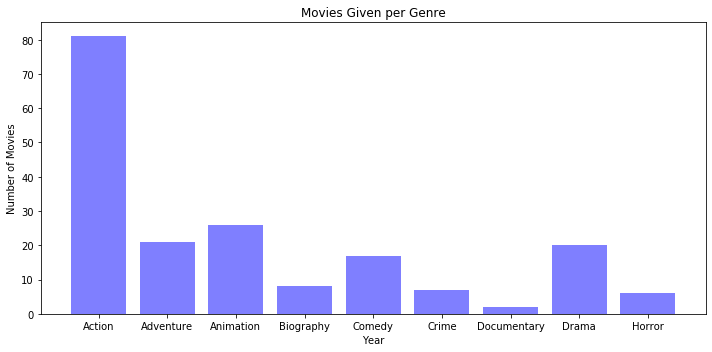

In [36]:
#Bar graph show the variety of movies by year made
x_axis = np.arange(len(movie_genre_group_clean))
tick_locations = [value+0.4 for value in x_axis]
                  
plt.figure(figsize=(10,5))
plt.bar(x_axis, movie_genre_group_clean["Movies"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, movie_genre_group_clean["Genre"], rotation="horizontal")

plt.title("Movies Given per Genre")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

In [37]:
#Get a count of movies by each director
movie_director = movie_short_rename.groupby(["Director"]).count()
#place an index value so the results can be graphed
movie_director.reset_index(level=0, inplace=True)
#Drop row w/o director name
movie_director_clean = movie_director[movie_director.Director != ""]
movie_director_clean

,Director,Movies,Genre,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
1,Abolhassan Davoodi,2,2,2,2,2,2
2,Adam Robitel,1,1,1,1,1,1
3,Adil El Arbi,1,1,1,1,1,1
4,Adrian Grunberg,1,1,1,1,1,1
5,Alan Taylor,1,1,1,1,1,1
6,Alejandro G. Iñárritu,1,1,1,1,1,1
7,Alfonso Cuarón,1,1,1,1,1,1
8,Alfred Hitchcock,1,1,1,1,1,1
9,Andrew Patterson,1,1,1,1,1,1
10,Andrew Stanton,1,1,1,1,1,1


In [38]:
#Remove any directors with 2 or less movies
movie_director_cleaner = movie_director_clean[movie_director.Movies > 2]
movie_director_cleaner

C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Director,Movies,Genre,Release_Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
13,Anthony Russo,3,3,3,3,3,3
31,Christopher Nolan,4,4,4,4,4,4
39,David Fincher,3,3,3,3,3,3
43,David Yates,4,4,4,4,4,4
61,Hayao Miyazaki,3,3,3,3,3,3
63,James Cameron,4,4,4,4,4,4
104,Peter Jackson,5,5,5,5,5,5
108,Quentin Tarantino,3,3,3,3,3,3
111,Ridley Scott,5,5,5,5,5,5
131,Steven Spielberg,3,3,3,3,3,3


In [39]:
#Group movies by release year
movie_year = movie_short_rename.groupby(["Release_Year"]).count()
#Add index so data can be graphed
movie_year.reset_index(level=0, inplace=True)
#Remove column with no year listed
movie_year_clean = movie_year[movie_year.Release_Year != 0]
movie_year_clean.head()

,Release_Year,Movies,Genre,Director,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
0,,1,1,1,1,1,1
1,1954,1,1,1,1,1,1
2,1972,1,1,1,1,1,1
3,1975,1,1,1,1,1,1
4,1977,2,2,2,2,2,2


In [40]:
#Select only years that have more than 4 movies
movie_year_cleaner = movie_year_clean[movie_year.Movies >= 4]
movie_year_cleaner

,Release_Year,Movies,Genre,Director,IMDB Rating,Rotten Tomato Rating,Metacritic Rating
20,2002,5,5,5,5,5,5
21,2003,6,6,6,6,6,6
26,2008,4,4,4,4,4,4
30,2012,9,9,9,9,9,9
31,2013,5,5,5,5,5,5
32,2014,15,15,15,15,15,15
33,2015,14,14,14,14,14,14
34,2016,8,8,8,8,8,8
35,2017,8,8,8,8,8,8
36,2018,9,9,9,9,9,9


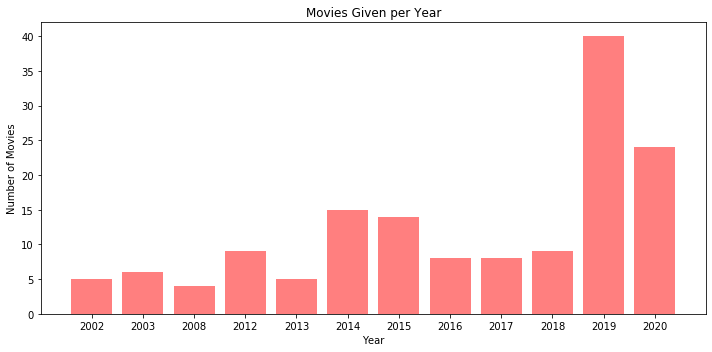

In [41]:
#Bar graph show the variety of movies by year made
x_axis = np.arange(len(movie_year_cleaner))
tick_locations = [value+0.4 for value in x_axis]
                  
plt.figure(figsize=(10,5))
plt.bar(x_axis, movie_year_cleaner["Movies"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, movie_year_cleaner["Release_Year"], rotation="horizontal")

plt.title("Movies Given per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


In [42]:
#Get movie counts for each IMDB score
movie_imdb_score = movie_short_rename.groupby(["IMDB Rating"]).count()
#Drop N/A and spaces from IMDB Rating
movie_imdb_nona = movie_imdb_score.drop(['N/A',''], axis=0)
#Put index on df so it can be graphed
movie_imdb_nona.reset_index(level=0, inplace=True)
movie_imdb_nona.head()

,IMDB Rating,Movies,Genre,Director,Release_Year,Rotten Tomato Rating,Metacritic Rating
0,3.7,1,1,1,1,1,1
1,4.1,1,1,1,1,1,1
2,4.5,1,1,1,1,1,1
3,4.8,1,1,1,1,1,1
4,5.1,1,1,1,1,1,1


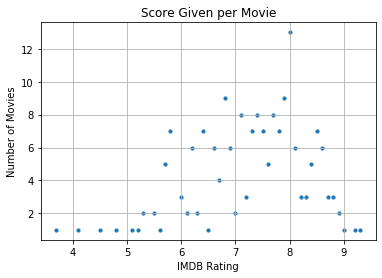

In [43]:
#Convert data to numbers
movie_imdb_nona = movie_imdb_nona.apply(pd.to_numeric) 

#Convert to scatter plot
#IMDB range is 1 to 10
#Where do the majority of movies fall >= or <5?(MOst are above 5 so they are "good" movies)
plt.scatter(movie_imdb_nona["IMDB Rating"], movie_imdb_nona["Movies"], marker="o", s=10)

plt.title("Score Given per Movie")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [44]:
#Number of movies per metacritic score
movie_metacritic_score = movie_short_rename.groupby(["Metacritic Rating"]).count()
movie_metacritic_score.head()

,Movies,Genre,Director,Release_Year,IMDB Rating,Rotten Tomato Rating
Metacritic Rating,,,,,,
,18,18,18,18,18,18
100,1,1,1,1,1,1
22,1,1,1,1,1,1
26,3,3,3,3,3,3
27,1,1,1,1,1,1


In [45]:
#Drop N/A and spaces from Metacritic Rating column
movie_metacritic_nona = movie_metacritic_score.drop(['N/A',''], axis=0)
#Put index on df so it can be graphed
movie_metacritic_nona.reset_index(level=0, inplace=True)
movie_metacritic_nona.head()

,Metacritic Rating,Movies,Genre,Director,Release_Year,IMDB Rating,Rotten Tomato Rating
0,100,1,1,1,1,1,1
1,22,1,1,1,1,1,1
2,26,3,3,3,3,3,3
3,27,1,1,1,1,1,1
4,30,1,1,1,1,1,1


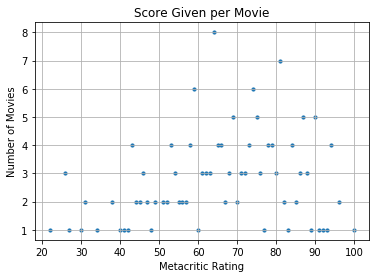

In [46]:
#Convert column values to numbers
movie_metacritic_nona = movie_metacritic_nona.apply(pd.to_numeric)

#Create scatter plot
#IMDB range is 1 to 100
# Where do the majority of movies fall >= or <60?
#Since the scoresare between 20 and 100, 60 is the midpoint


plt.scatter(movie_metacritic_nona["Metacritic Rating"], movie_metacritic_nona["Movies"], marker="o", s=10)

plt.title("Score Given per Movie")
plt.xlabel("Metacritic Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [47]:
IMDB_numeric = rotten_df["IMDB Rating"].astype(float)*10
IMDB_numeric

metacritic_numeric = rotten_df["Metacritic Rating"].astype(float)
metacritic_numeric

rotten_split = rotten_df["Rotten Tomato Rating"].str.split("%", n=2, expand=True)
rotten_numeric= rotten_split[0].astype(float)
rotten_numeric



director_df = pd.DataFrame({"Director": rotten_df["Director"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })

director_df

#director_df.loc[df['Director'].isin(some_values)]


,Director,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
1,Anna Boden,69.0,64.0,78.0
2,Ridley Scott,84.0,89.0,98.0
3,Makoto Shinkai,84.0,79.0,98.0
4,Jeff Wadlow,48.0,22.0,8.0
7,James Foley,45.0,31.0,12.0
8,Luc Besson,77.0,52.0,70.0
9,Peter Jackson,88.0,92.0,91.0
11,Joachim Rønning,66.0,43.0,40.0
13,Peter Jackson,78.0,58.0,64.0
14,Alan Taylor,64.0,38.0,27.0


In [48]:
len(movie_director)

148

In [49]:
movie_director = director_df.groupby(["Director"]).count()
movie_director.reset_index(level=0, inplace=True)
movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
movie_director_clean.head() 

,Director,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
9,Anthony Russo,3,3,3
11,Barry Sonnenfeld,2,2,2
14,Bong Joon Ho,2,2,2
20,Chris Buck,2,2,2
21,Chris Columbus,2,2,2


In [50]:
director_df = pd.DataFrame({"Director": movie_director_clean["Director"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })

director_df
director_clean_df = director_df.loc[(director_df["Director"] != "NaN")]
director_final = director_clean_df.dropna()
director_final.reset_index(level=0, inplace=True)
director_final_cut = director_final[["Director",
                                        "IMDB Rating",
                                        "Metacritic Rating",
                                        "Rotten Tomato Rating",
                                        ]]
director_final_cut

,Director,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
0,Anthony Russo,88.0,92.0,91.0
1,Barry Sonnenfeld,66.0,43.0,40.0
2,Bong Joon Ho,64.0,38.0,27.0
3,Chris Buck,66.0,47.0,64.0
4,Chris Columbus,71.0,69.0,78.0
5,Christopher Nolan,77.0,66.0,84.0
6,David Fincher,68.0,41.0,32.0
7,Frank Darabont,73.0,76.0,97.0
8,Hayao Miyazaki,79.0,82.0,97.0
9,Jon Watts,86.0,74.0,72.0


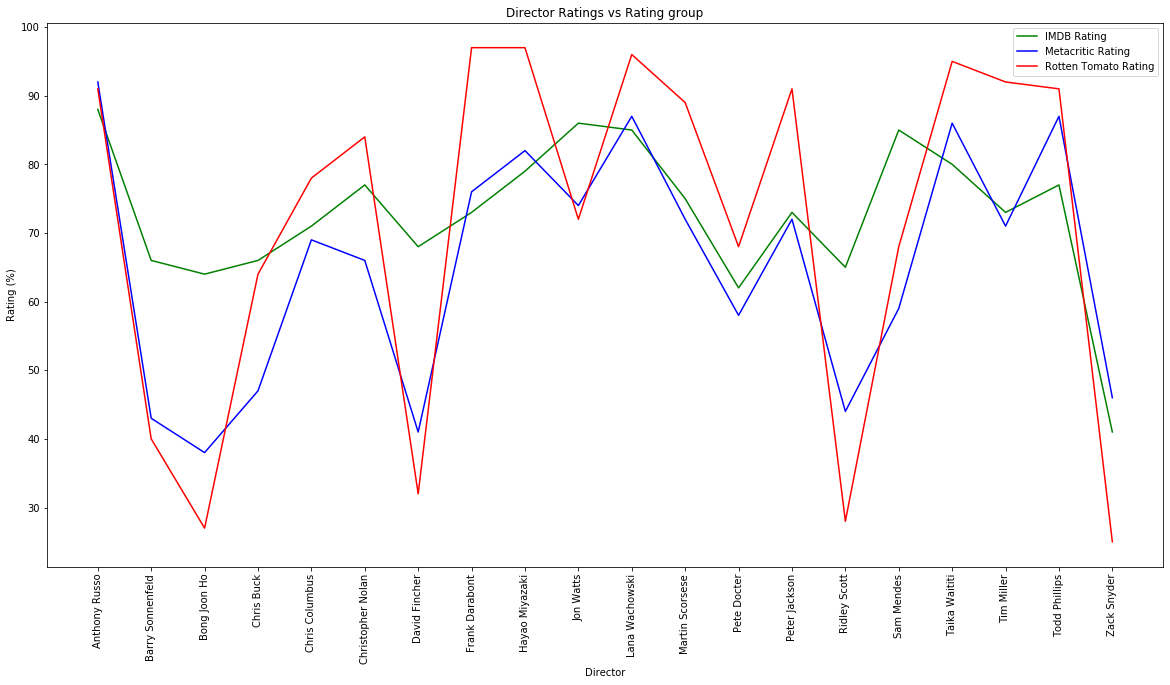

In [51]:
plt.figure(figsize=(20,10))
# Plot our line that will be used to compare Directors' IMDB Rating
plt.plot(director_final_cut["Director"], director_final_cut["IMDB Rating"], color="green", label="IMDB Rating")

# Plot our line that will be used to compare Directors' Metacritic Rating
plt.plot(director_final_cut["Director"], director_final_cut["Metacritic Rating"], color="blue", label="Metacritic Rating")
                                    
# Plot our line that will be used to compare Directors' Rotten Tomato Score
plt.plot(director_final_cut["Director"], director_final_cut["Rotten Tomato Rating"], color="red", label="Rotten Tomato Rating")            

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Director Ratings vs Rating group")
plt.xlabel("Director")
plt.xticks(director_final_cut["Director"], rotation="vertical")
plt.ylabel("Rating (%)")

# Print our chart to the screen
plt.show()

C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


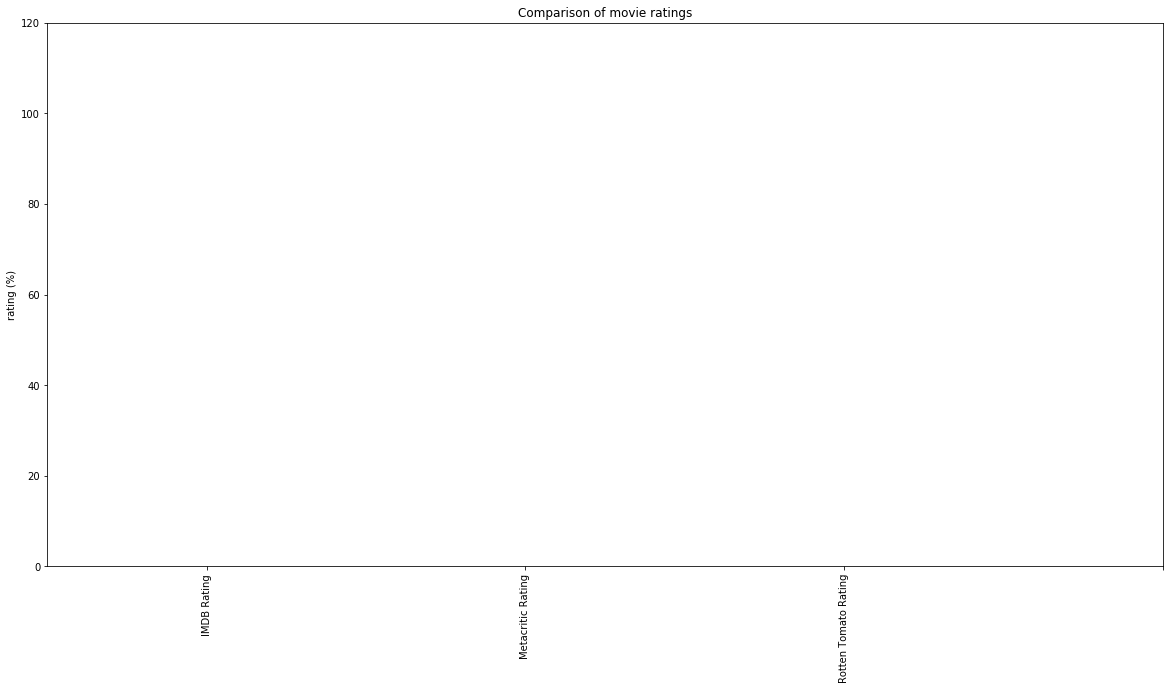

In [52]:
#IMDB_Rating = director_df["IMDB Rating"]

#Metacritic_Rating = director_df["Metacritic Rating"]
#Rotten_Tomato_Rating = director_df["Rotten Tomato Rating"]

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Comparison of movie ratings')
ax1.set_ylabel('rating (%)')
ax1.boxplot([director_df["IMDB Rating"], director_df["Metacritic Rating"], director_df["Rotten Tomato Rating"]])
plt.xticks([1, 2, 3, 4], ["IMDB Rating", "Metacritic Rating", "Rotten Tomato Rating"], rotation="vertical",)
plt.ylim(0,120)
plt.show()

In [53]:
genre_df = pd.DataFrame({"Genre": rotten_df["Genre"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })
genre_df
#movie_type = rotten_df.groupby(["Genre"]).mean()
#movie_director.reset_index(level=0, inplace=True)
#movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
#movie_type

,Genre,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
1,Action,69.0,64.0,78.0
2,Horror,84.0,89.0,98.0
3,Animation,84.0,79.0,98.0
4,Adventure,48.0,22.0,8.0
7,Drama,45.0,31.0,12.0
8,Action,77.0,52.0,70.0
9,Action,88.0,92.0,91.0
11,Adventure,66.0,43.0,40.0
13,Adventure,78.0,58.0,64.0
14,Action,64.0,38.0,27.0


In [54]:
movie_type = genre_df.groupby(["Genre"]).mean()
#movie_director.reset_index(level=0, inplace=True)
#movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
movie_type

,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
Genre,,,
Action,72.319444,63.166667,70.902778
Adventure,75.888889,69.000000,74.277778
Animation,77.450000,76.850000,89.350000
Biography,78.428571,78.714286,93.000000
Comedy,70.833333,64.583333,71.500000
Crime,86.666667,75.666667,84.166667
Drama,74.000000,70.888889,76.888889
Horror,65.750000,66.750000,66.750000


In [55]:
genre_df = pd.DataFrame({"Genre": rotten_df["Genre"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })
genre_df
movie_type = genre_df.groupby(["Genre"]).mean()
movie_type

,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
Genre,,,
Action,72.319444,63.166667,70.902778
Adventure,75.888889,69.000000,74.277778
Animation,77.450000,76.850000,89.350000
Biography,78.428571,78.714286,93.000000
Comedy,70.833333,64.583333,71.500000
Crime,86.666667,75.666667,84.166667
Drama,74.000000,70.888889,76.888889
Horror,65.750000,66.750000,66.750000


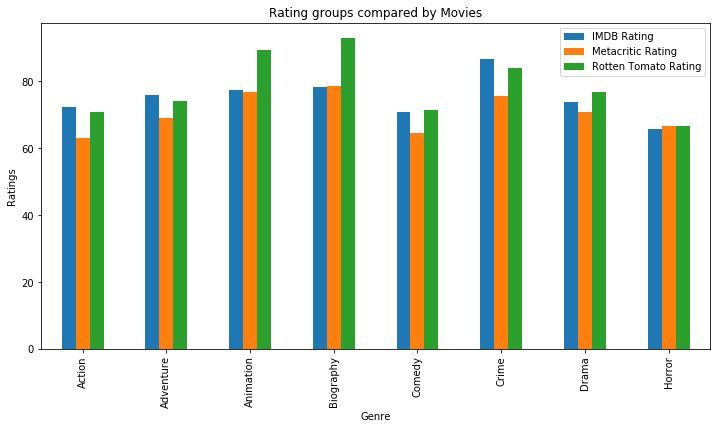

In [66]:
movie_type.plot(kind='bar', legend=['Genre'], figsize=(12, 6))
plt.title("Rating groups compared by Movies")
plt.ylabel("Ratings")
plt.xlabel("Genre")
plt.show()

In [67]:
director_df = pd.DataFrame({"Director": movie_director_clean["Director"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })
director_df
director_clean_df = director_df.loc[(director_df["Director"] != "NaN")]
director_final = director_clean_df.dropna()
#director_final.reset_index(level=0, inplace=True)
director_final.set_index("Director", inplace=True, drop=True)
director_final

,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
Director,,,
Anthony Russo,88.0,92.0,91.0
Barry Sonnenfeld,66.0,43.0,40.0
Bong Joon Ho,64.0,38.0,27.0
Chris Buck,66.0,47.0,64.0
Chris Columbus,71.0,69.0,78.0
Christopher Nolan,77.0,66.0,84.0
David Fincher,68.0,41.0,32.0
Frank Darabont,73.0,76.0,97.0
Hayao Miyazaki,79.0,82.0,97.0


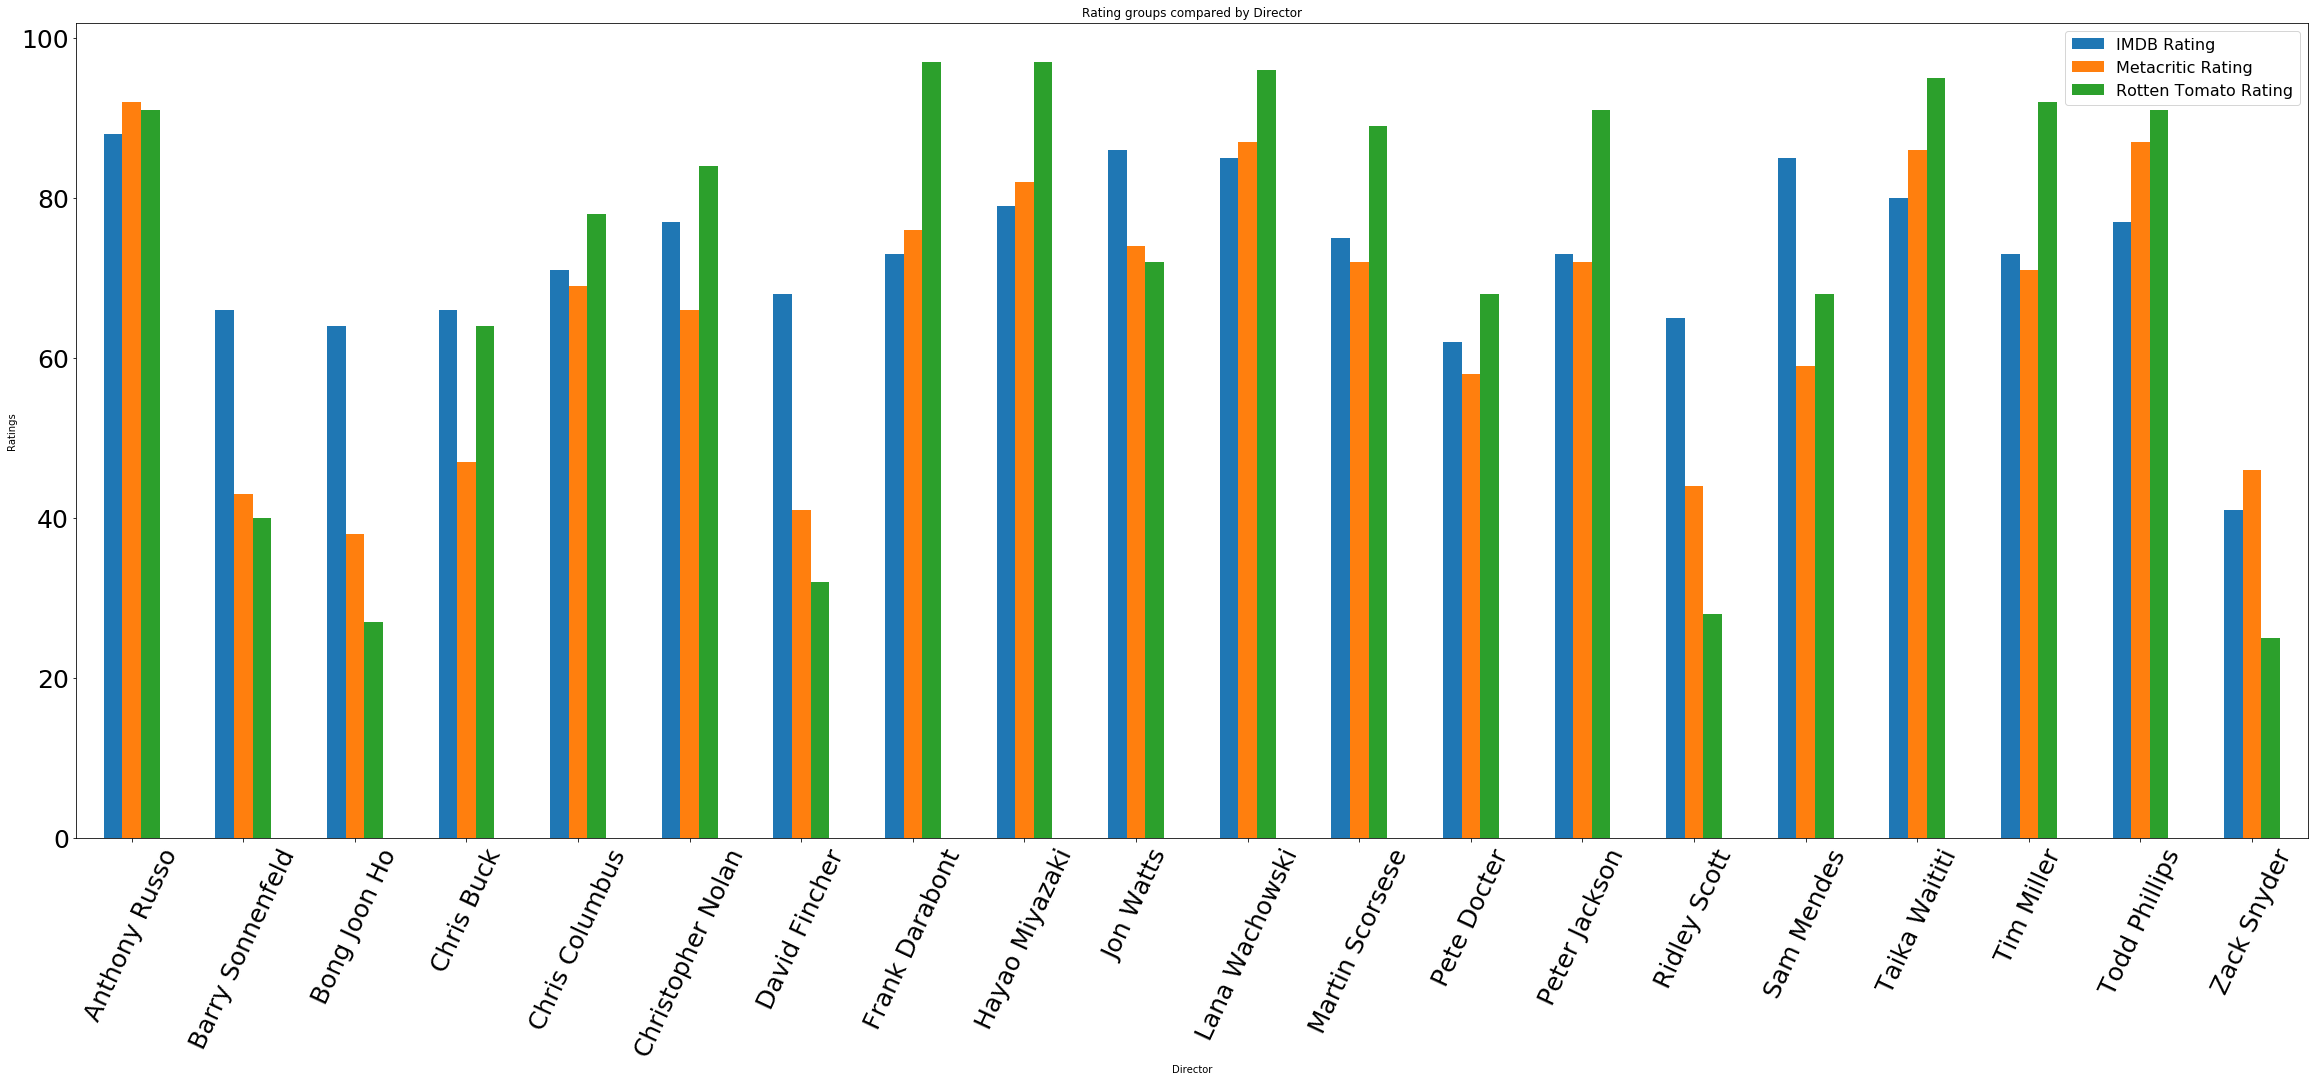

In [94]:
director_final.plot(kind='bar', legend=['Director'], figsize=(40,15), rot=65, fontsize=25)
plt.title("Rating groups compared by Director")
plt.ylabel("Ratings")
plt.xlabel("Director")
plt.legend(loc="best", fontsize=16)
plt.show()